In [132]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from numpy.linalg import inv

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

In [133]:
Data = pd.read_csv("/content/sample_data/kc_house_data.csv")

In [134]:
Data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


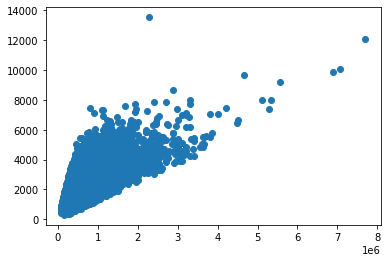

In [135]:
plt.scatter(Data.price,Data.sqft_living)

**Régression linéaire simple**

In [136]:
X=np.array(Data['sqft_living']).reshape(-1,1)

Y=np.array(Data['price']).reshape(-1,1)

In [137]:
reg = LinearRegression()

pred = reg.fit(X,Y)

Ypred = reg.predict(X)

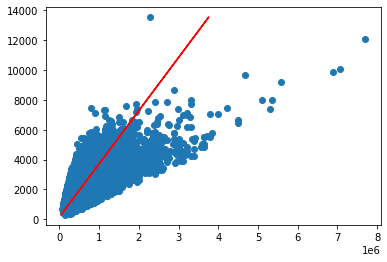

In [138]:
plt.scatter(Data.price,Data.sqft_living)

plt.plot(Ypred,Data.sqft_living, color='red')

In [139]:
w0 = reg.intercept_

w1 = reg.coef_
hx = w0 + np.dot(X,w1)


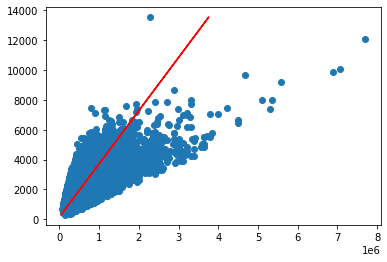

In [140]:
plt.scatter(Data.price,Data.sqft_living)

plt.plot(hx,Data.sqft_living, color='red')

In [141]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y,Ypred)

68351286833.039825

In [142]:
mean_squared_error(Y,Ypred)

68351286833.039825

**Régression polynomiale**

In [143]:
data_salary = pd.read_csv("/content/sample_data/salary_data.csv")

data_salary.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [144]:
X2 = np.array(data_salary["YearsExperience"]).reshape(-1,1)

Y2 = np.array(data_salary["Salary"]).reshape(-1,1)

In [145]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.2, random_state=0)

In [146]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X2, Y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

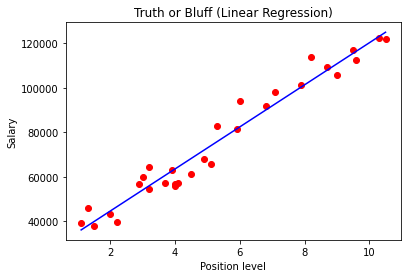

In [147]:
plt.scatter(X2,Y2, color = 'red')

plt.plot(X2, lin_reg.predict(X2), color='blue')

plt.title('Truth or Bluff (Linear Regression)')

plt.xlabel('Position level')

plt.ylabel('Salary')

plt.show()


In [148]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=4)

X_poly = poly_reg.fit_transform(X2)

pol_reg = LinearRegression()

pol_reg.fit(X_poly, Y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

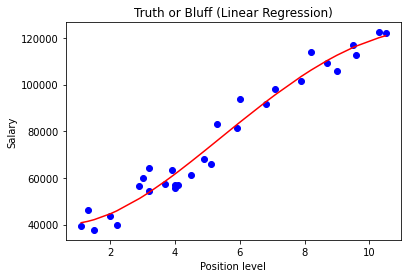

In [149]:
plt.scatter(X2, Y2, color='blue')

plt.plot(X2, pol_reg.predict(poly_reg.fit_transform(X2)), color='red')

plt.title('Truth or Bluff (Linear Regression)')

plt.xlabel('Position level')

plt.ylabel('Salary')

plt.show()

In [150]:
Y2pred_poly=pol_reg.predict(poly_reg.fit_transform(X2))

mean_squared_error(Y2,Y2pred_poly, squared=False)

Y2pred_lin=lin_reg.predict(X2)

mean_squared_error(Y2,Y2pred_lin, squared=False)

5592.043608760661